<a href="https://colab.research.google.com/github/srujayreddyv/CSC177-P4-ClusterAnalysis-ANN-TextMiningProject/blob/main/CSC177_P4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC177- Project 4 Clustering
# Cluster Analysis, ANN and Text Mining Project (Fall 2023)

## Team Challengers (23):
  1. Srujay Reddy Vangoor
  2. Vaibhav Jain
  3. Bashar Allwza
  4. Varun Bailapudi
  5. Uddayankith Chodagam

## DATA PREPROCESSING

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imdb_dataset.csv to imdb_dataset.csv


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

In [ ]:
df = pd.read_csv('imdb_dataset.csv')

In [ ]:
df

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


In [ ]:
df.isnull().values.any()

True

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 650
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        619 non-null    int64  
 1   title             619 non-null    object 
 2   title_type        619 non-null    object 
 3   genre             619 non-null    object 
 4   runtime           619 non-null    float64
 5   mpaa_rating       619 non-null    object 
 6   studio            619 non-null    object 
 7   thtr_rel_year     619 non-null    int64  
 8   thtr_rel_month    619 non-null    int64  
 9   thtr_rel_day      619 non-null    int64  
 10  dvd_rel_year      619 non-null    float64
 11  dvd_rel_month     619 non-null    float64
 12  dvd_rel_day       619 non-null    float64
 13  imdb_rating       619 non-null    float64
 14  imdb_num_votes    619 non-null    int64  
 15  critics_rating    619 non-null    object 
 16  critics_score     619 non-null    int64  
 1

In [ ]:
df=df.drop(['Unnamed: 0','title','title_type'],axis=1)

In [ ]:
df.nunique(axis=0)

genre                11
runtime              86
mpaa_rating           6
studio              202
thtr_rel_year        43
thtr_rel_month       12
thtr_rel_day         31
dvd_rel_year         22
dvd_rel_month        12
dvd_rel_day          31
imdb_rating          54
imdb_num_votes      613
critics_rating        3
critics_score        99
audience_rating       2
audience_score       83
best_pic_nom          2
best_pic_win          2
best_actor_win        2
best_actress_win      2
best_dir_win          2
top200_box            2
director            504
actor1              461
actor2              550
actor3              580
actor4              590
actor5              598
imdb_url            618
rt_url              618
dtype: int64

In [ ]:
categorical_cols =['genre','mpaa_rating','critics_rating','audience_rating','best_pic_nom', 'best_pic_win', 'best_actor_win',
       'best_actress_win', 'best_dir_win', 'top200_box']

In [ ]:
df=pd.get_dummies(df, columns=categorical_cols)

In [ ]:
df

,runtime,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,...,best_pic_win_no,best_pic_win_yes,best_actor_win_no,best_actor_win_yes,best_actress_win_no,best_actress_win_yes,best_dir_win_no,best_dir_win_yes,top200_box_no,top200_box_yes
0,80.0,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,...,1,0,1,0,1,0,1,0,1,0
1,101.0,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,...,1,0,1,0,1,0,1,0,1,0
2,84.0,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,...,1,0,1,0,1,0,1,0,1,0
3,139.0,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,...,1,0,0,1,1,0,0,1,1,0
4,90.0,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,97.0,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,...,1,0,1,0,1,0,1,0,1,0
647,82.0,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,...,1,0,1,0,1,0,1,0,1,0
648,87.0,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,...,1,0,1,0,1,0,1,0,1,0
649,120.0,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,...,1,0,1,0,1,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 650
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   runtime                          619 non-null    float64
 1   studio                           619 non-null    object 
 2   thtr_rel_year                    619 non-null    int64  
 3   thtr_rel_month                   619 non-null    int64  
 4   thtr_rel_day                     619 non-null    int64  
 5   dvd_rel_year                     619 non-null    float64
 6   dvd_rel_month                    619 non-null    float64
 7   dvd_rel_day                      619 non-null    float64
 8   imdb_rating                      619 non-null    float64
 9   imdb_num_votes                   619 non-null    int64  
 10  critics_score                    619 non-null    int64  
 11  audience_score                   619 non-null    int64  
 12  director              

In [ ]:
one = df[['genre_Action & Adventure', 'genre_Animation',
       'genre_Art House & International', 'genre_Comedy', 'genre_Documentary',
       'genre_Drama', 'genre_Horror', 'genre_Musical & Performing Arts',
       'genre_Mystery & Suspense', 'genre_Other',
       'genre_Science Fiction & Fantasy', 'mpaa_rating_G', 'mpaa_rating_NC-17',
       'mpaa_rating_PG', 'mpaa_rating_PG-13', 'mpaa_rating_R',
       'mpaa_rating_Unrated', 'critics_rating_Certified Fresh',
       'critics_rating_Fresh', 'critics_rating_Rotten',
       'audience_rating_Spilled', 'audience_rating_Upright', 'best_pic_nom_no',
       'best_pic_nom_yes', 'best_pic_win_no', 'best_pic_win_yes',
       'best_actor_win_no', 'best_actor_win_yes', 'best_actress_win_no',
       'best_actress_win_yes', 'best_dir_win_no', 'best_dir_win_yes',
       'top200_box_no', 'top200_box_yes']]

In [ ]:
two = df.drop(['genre_Action & Adventure', 'genre_Animation',
       'genre_Art House & International', 'genre_Comedy', 'genre_Documentary',
       'genre_Drama', 'genre_Horror', 'genre_Musical & Performing Arts',
       'genre_Mystery & Suspense', 'genre_Other',
       'genre_Science Fiction & Fantasy', 'mpaa_rating_G', 'mpaa_rating_NC-17',
       'mpaa_rating_PG', 'mpaa_rating_PG-13', 'mpaa_rating_R',
       'mpaa_rating_Unrated', 'critics_rating_Certified Fresh',
       'critics_rating_Fresh', 'critics_rating_Rotten',
       'audience_rating_Spilled', 'audience_rating_Upright', 'best_pic_nom_no',
       'best_pic_nom_yes', 'best_pic_win_no', 'best_pic_win_yes',
       'best_actor_win_no', 'best_actor_win_yes', 'best_actress_win_no',
       'best_actress_win_yes', 'best_dir_win_no', 'best_dir_win_yes',
       'top200_box_no', 'top200_box_yes'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
two=two.drop(['studio','director','imdb_url','rt_url','actor1','actor2','actor3','actor4','actor5'],axis=1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
two= pd.DataFrame(scaler.fit_transform(two))

In [ ]:
two

,0,1,2,3,4,5,6,7,8,9,10
0,0.074257,0.976190,0.272727,0.600000,0.916667,0.545455,0.966667,0.507042,0.000802,0.444444,0.720930
1,0.178218,0.690476,0.181818,0.433333,0.416667,0.636364,0.900000,0.760563,0.013555,0.959596,0.813953
2,0.094059,0.571429,0.636364,0.666667,0.416667,0.636364,0.666667,0.802817,0.024863,0.909091,0.930233
3,0.366337,0.500000,0.818182,0.000000,0.416667,0.909091,0.166667,0.746479,0.039104,0.797980,0.755814
4,0.123762,0.761905,0.727273,0.300000,0.583333,0.272727,0.600000,0.450704,0.002467,0.323232,0.186047
...,...,...,...,...,...,...,...,...,...,...,...
614,0.158416,0.857143,0.545455,0.333333,0.708333,0.818182,0.900000,0.563380,0.009142,0.434343,0.174419
615,0.084158,0.619048,0.000000,0.500000,0.291667,0.454545,0.966667,0.676056,0.052206,0.282828,0.813953
616,0.108911,0.857143,0.181818,0.266667,0.708333,0.818182,0.433333,0.563380,0.011093,0.797980,0.476744
617,0.272277,0.761905,0.454545,0.500000,0.541667,0.909091,0.033333,0.549296,0.073778,0.303030,0.267442


In [ ]:
input=x = pd.concat([one,two], axis = 1)

In [ ]:
input.isnull().values.any()

True

In [ ]:
input=input.dropna()

## KMEANS MODEL CREATION AND GRAPH FOR SSE AND NUMBER OF CLUSTERS

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
input.columns = input.columns.astype(str)

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
         random_state=0
    )
    km.fit(input)
    distortions.append(km.inertia_)

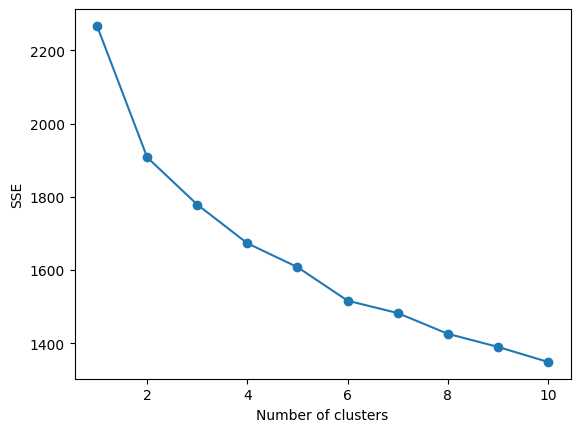

In [ ]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

## ELBOW METHOD

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kmeans = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")

kmeans.elbow

4

## HIERARICAL CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering

## Single Link

In [ ]:
model = AgglomerativeClustering(linkage="single",
                                distance_threshold = 7,
                                n_clusters=None)

In [ ]:
model.fit(input)

AgglomerativeClustering(distance_threshold=7, linkage='single', n_clusters=None)

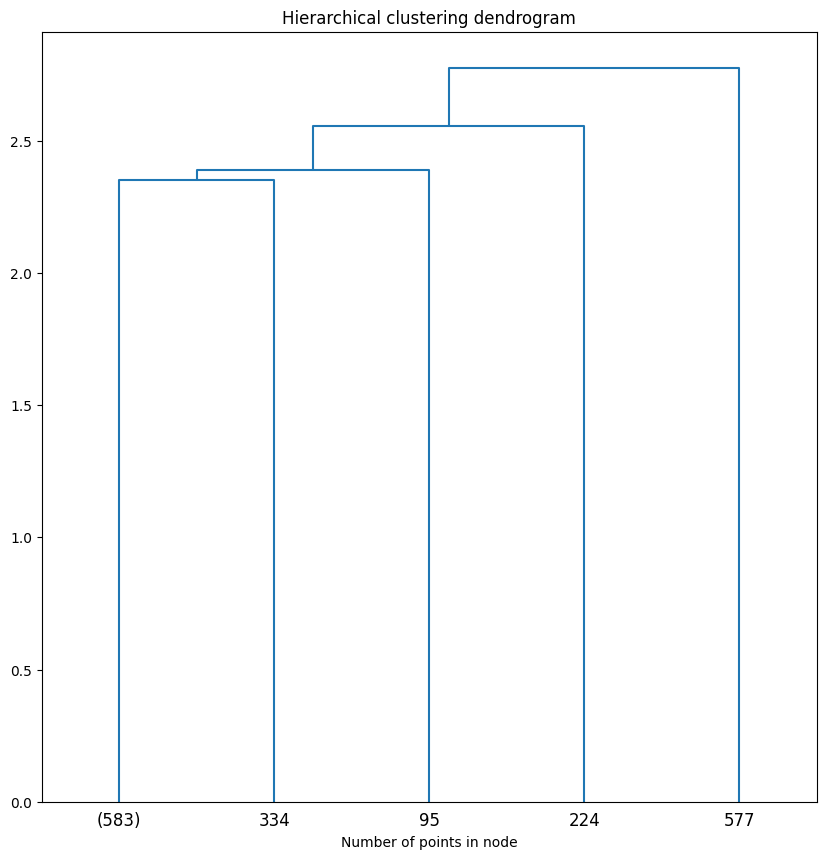

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 7, color = "r", linestyle = "--")
plt.axhline(y = 6, color = "r", linestyle = "--")
plt.axhline(y = 9, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()


## Complete Link

In [ ]:
model = AgglomerativeClustering(linkage="complete",
                                distance_threshold = 7,
                                n_clusters=None)

In [ ]:
model.fit(input)

AgglomerativeClustering(distance_threshold=7, linkage='complete',
                        n_clusters=None)

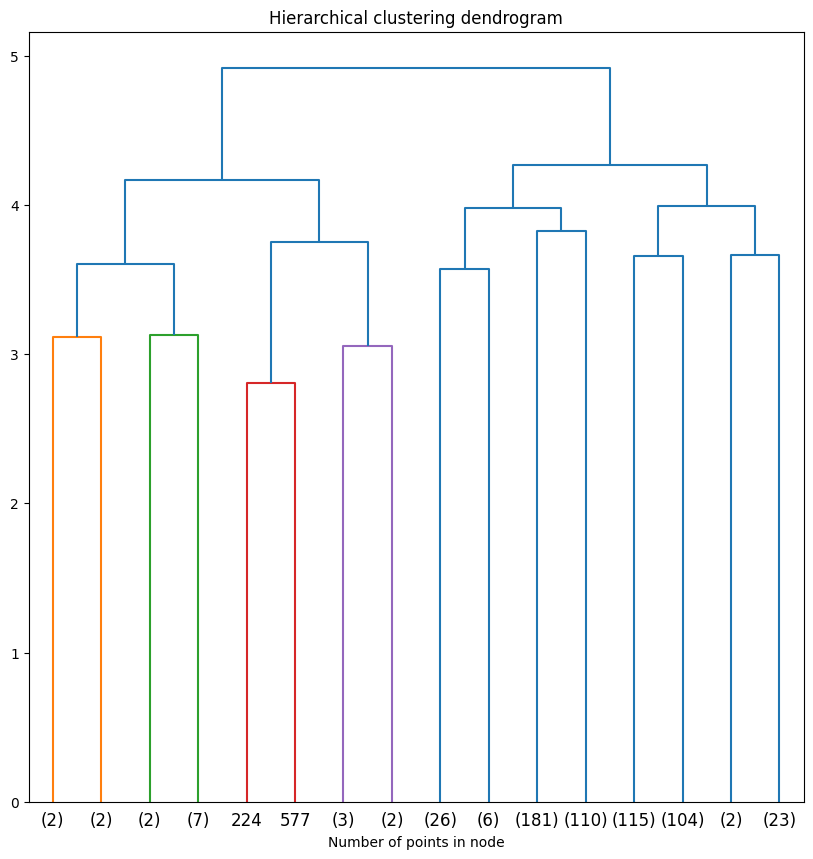

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 7, color = "r", linestyle = "--")
plt.axhline(y = 6, color = "r", linestyle = "--")
plt.axhline(y = 9, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()


## Average Link

In [ ]:
model = AgglomerativeClustering(linkage="average",
                                distance_threshold = 7,
                                n_clusters=None)

In [ ]:
model.fit(input)

AgglomerativeClustering(distance_threshold=7, linkage='average',
                        n_clusters=None)

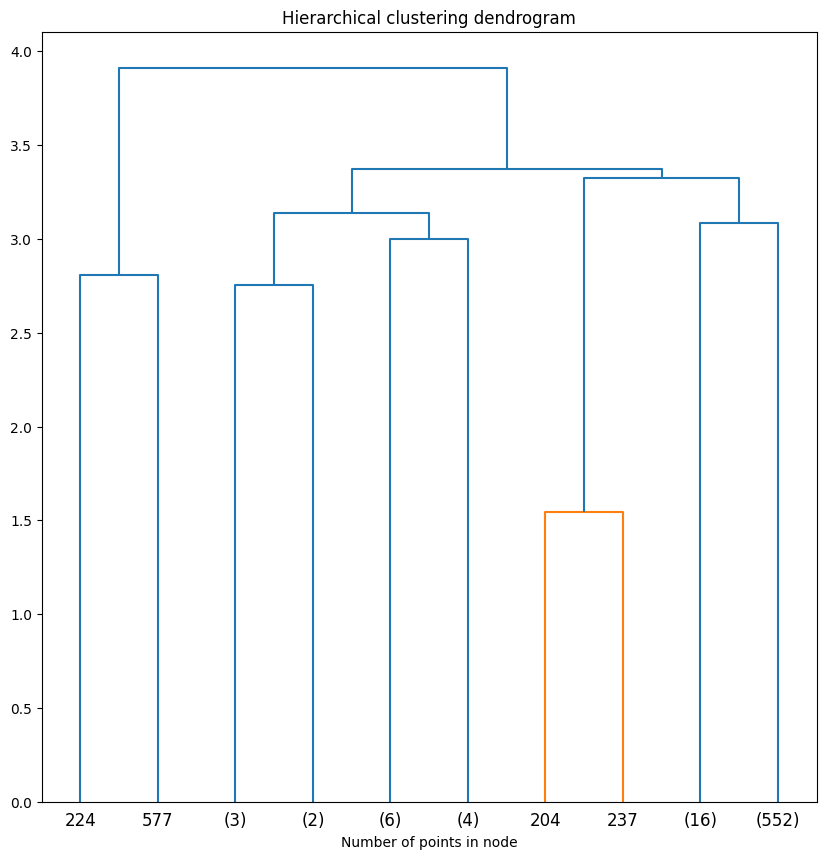

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 7, color = "r", linestyle = "--")
plt.axhline(y = 6, color = "r", linestyle = "--")
plt.axhline(y = 9, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()